In [16]:
import math

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(0)

In [17]:
# constant for later usage
b_0 = -1.0
b_1 = 0.5
sig_sq_original = 0.25
sig_sq_less_noise = 0.1
sig_sq_more_noise = 0.5

In [18]:
def generate_and_describe_sample(sig_sq=0.25):
    x = np.random.normal(0, 1.0, 100)
    eps = np.random.normal(0, sig_sq, 100)
    y = -1.0 + 0.5 * x + eps
    plt.scatter(x, y)
    x_lin = np.linspace(-3, 3, 10)
    plt.plot(x_lin, -1.0 + 0.5 * x_lin, c="black", label="population regression line")
    plt.legend()
    return x, y

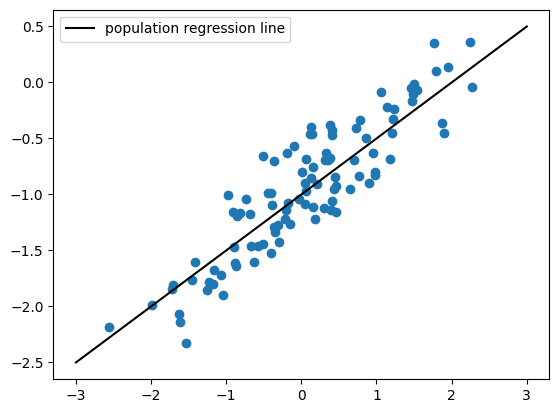

In [19]:
x, y = generate_and_describe_sample(sig_sq_original)

$|y| = 100$,
$\beta_0 = -1$,
$\beta_1 = 0.5$

In [20]:
def conduct_main_operations(X: np.array, Y: np.array):
    # fitting model
    model = LinearRegression().fit(X, Y)

    # scoring
    R_2 = model.score(X, Y)
    b_0_hat = model.intercept_
    b_1_hat = model.coef_[0]

    if len(model.coef_) > 1:
        b_2_hat = model.coef_[1]
        print(f"{R_2=}\n{b_0_hat=}\n{b_1_hat=}\n{b_2_hat=}")
    else:
        print(f"{R_2=}\n{b_0_hat=}\n{b_1_hat=}")

    print(f"b_0_hat_err={abs((b_0_hat - b_0) / b_0)}")
    print(f"b_1_hat_err={abs((b_1_hat - b_1) / b_1)}")

    return model

R_2=0.8112158448777356
b_0_hat=-0.9812117287368716
b_1_hat=0.5286746083865951
b_0_hat_err=0.01878827126312843
b_1_hat_err=0.05734921677319016


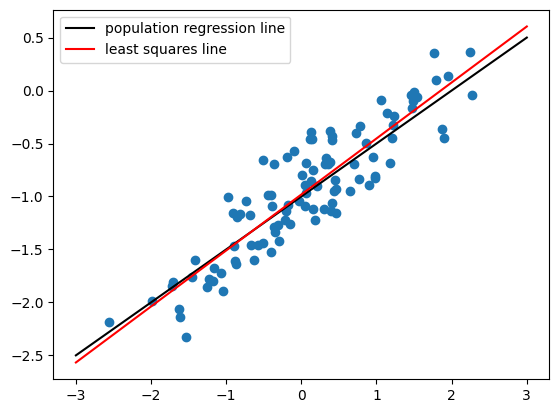

In [21]:
reg = conduct_main_operations(X=x.reshape((-1, 1)), Y=y)
plt.scatter(x.reshape((-1, 1)), y)
x_lin = np.linspace(-3, 3, 10)
b_0_hat = reg.intercept_
b_1_hat = reg.coef_[0]
plt.plot(x_lin, -1.0 + 0.5 * x_lin, c="black", label="population regression line")
plt.plot(x_lin, b_0_hat + b_1_hat * x_lin, c="red", label="least squares line")
plt.legend()

R_2=0.01432549835544239
b_0_hat=-0.9104720931905957
b_1_hat=-0.03393183046428665
b_2_hat=-0.038558627221305354
b_0_hat_err=0.08952790680940426
b_1_hat_err=1.0678636609285732


Text(0.5, 0, 'y')

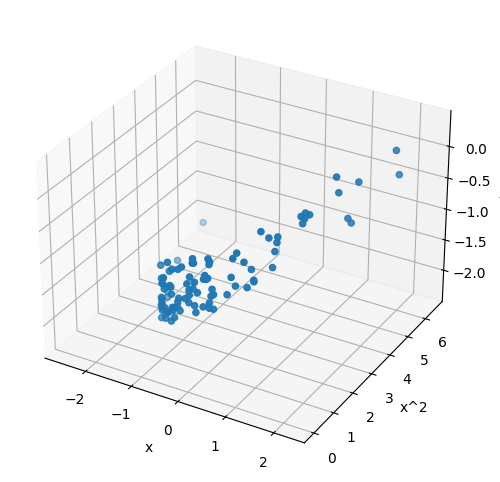

In [22]:
xx = np.array([x, np.square(x)]).reshape((-1, 2))
conduct_main_operations(X=xx, Y=y)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, np.square(x), y)
ax.set_xlabel('x')
ax.set_ylabel('x^2')
ax.set_zlabel('y')

R_2=0.9655109116261339
b_0_hat=-1.0189476906088235
b_1_hat=0.5123577935208171
b_0_hat_err=0.01894769060882351
b_1_hat_err=0.024715587041634235


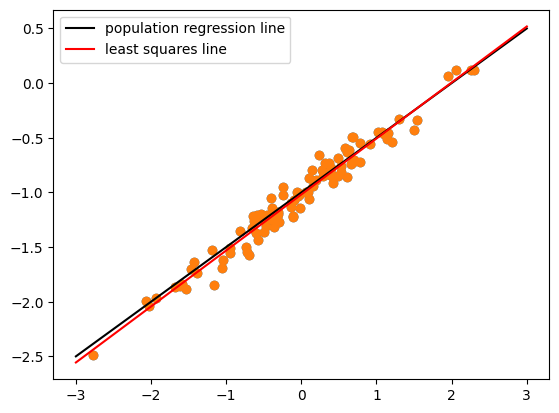

In [23]:
plt.clf()
x_less_noise, y_less_noise = generate_and_describe_sample(sig_sq=sig_sq_less_noise)
reg_less_noise = conduct_main_operations(X=x_less_noise.reshape((-1, 1)), Y=y_less_noise)
b_0_hat_less = reg_less_noise.intercept_
b_1_hat_less = reg_less_noise.coef_[0]
plt.scatter(x_less_noise.reshape((-1, 1)), y_less_noise)
x_lin = np.linspace(-3, 3, 10)
plt.plot(x_lin, b_0_hat_less + b_1_hat_less * x_lin, c="red", label="least squares line")
plt.legend()

R_2=0.5560342680492019
b_0_hat=-1.100884775291945
b_1_hat=0.5462197291469558
b_0_hat_err=0.10088477529194506
b_1_hat_err=0.09243945829391165


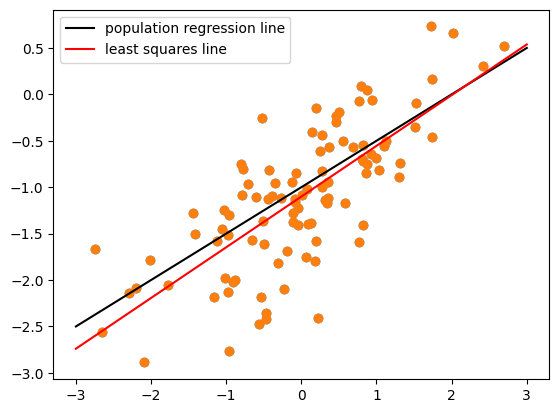

In [24]:
plt.clf()
x_more_noise, y_more_noise = generate_and_describe_sample(sig_sq=sig_sq_more_noise)
reg_more_noise = conduct_main_operations(X=x_more_noise.reshape((-1, 1)), Y=y_more_noise)
b_0_hat_more = reg_more_noise.intercept_
b_1_hat_more = reg_more_noise.coef_[0]
plt.scatter(x_more_noise.reshape((-1, 1)), y_more_noise)
x_lin = np.linspace(-3, 3, 10)
plt.plot(x_lin, b_0_hat_more + b_1_hat_more * x_lin, c="red", label="least squares line")
plt.legend()

A 95% confidence interval for estimator $\hat\Theta$ is $$[\hat\Theta - 1.96 \cdot SE(\hat\Theta), \hat\Theta + 1.96 \cdot SE(\hat\Theta)]$$ and $$SE(\hat\beta_0) = \sqrt{\sigma^2\left[\frac{1}{n} + \frac{\bar x^2}{\sum_{i=1}^{n}{(x_i - \bar x)^2}}\right]$$ and $$SE(\hat\beta_1) = \sqrt{\frac{\sigma^2}{\sum_{i=1}^{n}{(x_i - \bar x)^2}}$$

In [25]:
def SE_B0(x, sig_sq):
    mean = x.mean()
    denominator = np.sum((x - mean) ** 2)
    return math.sqrt(sig_sq * (1 / 100 * (mean ** 2) / denominator))


def SE_B1(x, sig_sq):
    mean = x.mean()
    denominator = np.sum((x - mean) ** 2)
    return math.sqrt(sig_sq / denominator)

In [26]:
print(f"{SE_B0(x, sig_sq_original)=}")
print(f"{SE_B1(x, sig_sq_original)=}")

print(f"{SE_B0(x_less_noise, sig_sq_less_noise)=}")
print(f"{SE_B1(x_less_noise, sig_sq_less_noise)=}")

print(f"{SE_B0(x_more_noise, sig_sq_more_noise)=}")
print(f"{SE_B1(x_more_noise, sig_sq_more_noise)=}")

SE_B0(x, sig_sq_original)=0.00029670140459366485
SE_B1(x, sig_sq_original)=0.04960896995864848
SE_B0(x_less_noise, sig_sq_less_noise)=0.00019675245696992904
SE_B1(x_less_noise, sig_sq_less_noise)=0.033217110930916664
SE_B0(x_more_noise, sig_sq_more_noise)=8.565823069000326e-05
SE_B1(x_more_noise, sig_sq_more_noise)=0.06817634445969503


In [27]:
print(f"original: {b_0_hat=} > [{b_0_hat - 1.96 * SE_B0(x, sig_sq_original)},{b_0_hat + 1.96 * SE_B0(x, sig_sq_original)}]")
print(
    f"less noise: {b_0_hat_less=} > [{b_0_hat_less - 1.96 * SE_B0(x, sig_sq_original)},{b_0_hat_less + 1.96 * SE_B0(x, sig_sq_original)}]")
print(
    f"more noise: {b_0_hat_more=} > [{b_0_hat_more - 1.96 * SE_B0(x, sig_sq_original)},{b_0_hat_more + 1.96 * SE_B0(x, sig_sq_original)}]")

original: b_0_hat=-0.9812117287368716 > [-0.9817932634898752,-0.980630193983868]
less noise: b_0_hat_less=-1.0189476906088235 > [-1.019529225361827,-1.01836615585582]
more noise: b_0_hat_more=-1.100884775291945 > [-1.1014663100449487,-1.1003032405389415]


In [28]:
print(f"original: {b_1_hat=} > [{b_1_hat - 1.96 * SE_B1(x, sig_sq_original)},{b_1_hat + 1.96 * SE_B1(x, sig_sq_original)}]")
print(
    f"less noise: {b_1_hat_less=} > [{b_1_hat_less - 1.96 * SE_B1(x, sig_sq_original)},{b_1_hat_less + 1.96 * SE_B1(x, sig_sq_original)}]")
print(
    f"more noise: {b_1_hat_more=} > [{b_1_hat_more - 1.96 * SE_B1(x, sig_sq_original)},{b_1_hat_more + 1.96 * SE_B1(x, sig_sq_original)}]")

original: b_1_hat=0.5286746083865951 > [0.43144102726764405,0.625908189505546]
less noise: b_1_hat_less=0.5123577935208171 > [0.4151242124018661,0.6095913746397681]
more noise: b_1_hat_more=0.5462197291469558 > [0.4489861480280048,0.6434533102659068]
